<a href="https://colab.research.google.com/github/eric-pding/RSM8413_Group_Assignments/blob/main/RSM8413_Group_Assignment_4_Part2_Eric_ver.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# RSM8413: Group Assignment 4

## PART I

### 1. Preliminary Data Cleaning

In [23]:
from sklearn.cluster import KMeans
import plotly.express as px
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [24]:
# Reading in the Dataset
train = 'https://raw.githubusercontent.com/eric-pding/RSM8413_Group_Assignments/main/CensusCanada2021Training.csv'
test = 'https://raw.githubusercontent.com/eric-pding/RSM8413_Group_Assignments/main/CensusCanada2021Test.csv'

data_train = pd.read_csv(train)
data_test = pd.read_csv(test)

In [25]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5371 entries, 0 to 5370
Data columns (total 18 columns):
 #   Column                                                                     Non-Null Count  Dtype  
---  ------                                                                     --------------  -----  
 0   Total Population                                                           5371 non-null   int64  
 1   Total Households                                                           5297 non-null   float64
 2   Median Household Income (Current Year $)                                   5245 non-null   float64
 3   Total Households For Period Of Construction                                5297 non-null   float64
 4   Total Households For Period Of Construction Built Before 1961              5297 non-null   float64
 5   Total Households For Period Of Construction Built Between 1961 And 1980    5297 non-null   float64
 6   Total Households For Period Of Construction Built Betwee

In [26]:
data_train.head()

,Total Population,Total Households,Median Household Income (Current Year $),Total Households For Period Of Construction,Total Households For Period Of Construction Built Before 1961,Total Households For Period Of Construction Built Between 1961 And 1980,Total Households For Period Of Construction Built Between 1981 And 190,Total Households For Period Of Construction Built Between 1991 And 2000,Total Households For Period Of Construction Built Between 2001 And 2005,Total Households For Period Of Construction Built Between 2006 And 2010,Total Households For Period Of Construction Built Between 2011 And 2015,Total Households For Period Of Construction Built Between 2016 And 2021,Total Households For Structure Type Houses,"Total Households For Structure Type Apartment, Building Low And High Rise",Total Households For Structure Type Other Dwelling Types,Total Households for Tenure,Dwellings by Tenure Owner,Dwellings by Tenure Renter
0,3088,1235.0,107000.0,1235.0,25.0,1130.0,50.0,15.0,10.0,10.0,0.0,0.0,1135,130,0,1235.0,1055.0,180.0
1,5889,1665.0,111000.0,1665.0,0.0,0.0,0.0,15.0,20.0,375.0,315.0,935.0,1605,50,10,1665.0,1365.0,300.0
2,8090,2775.0,105000.0,2775.0,105.0,150.0,240.0,1210.0,555.0,165.0,240.0,120.0,2375,400,0,2775.0,2360.0,420.0
3,4074,1775.0,65000.0,1775.0,210.0,1100.0,260.0,85.0,35.0,45.0,30.0,15.0,1265,275,235,1775.0,1375.0,400.0
4,3642,1385.0,101000.0,1385.0,10.0,190.0,1010.0,165.0,0.0,0.0,10.0,0.0,1035,325,25,1385.0,1250.0,140.0


**Insights from the Dataset**


*   Missing Values in many of the columns (5371 in total but most had 5297)
*   Naming of the column (Total Households For Period Of Construction Built Between 1981 And 190)?





In [27]:
# Renaming the Misnamed Column
data_train.rename(columns= {"Total Households For Period Of Construction Built Between 1981 And 190":
                            "Total Households For Period Of Construction Built Between 1981 And 1990"}, inplace = True)
data_test.rename(columns= {"Total Households For Period Of Construction Built Between 1981 And 190":
                            "Total Households For Period Of Construction Built Between 1981 And 1990"}, inplace = True)

# Simplify Some Col Names
data_train.rename(columns= {"Total Population": "Population"}, inplace = True)
data_test.rename(columns= {"Total Population": "Population"}, inplace = True)

data_train.rename(columns= {"Total Households": "Households"}, inplace = True)
data_test.rename(columns= {"Total Households": "Households"}, inplace = True)

data_train.rename(columns= {"Median Household Income (Current Year $)": "Income"}, inplace = True)
data_test.rename(columns= {"Median Household Income (Current Year $)": "Income"}, inplace = True)

# check it
data_train.head()

,Population,Households,Income,Total Households For Period Of Construction,Total Households For Period Of Construction Built Before 1961,Total Households For Period Of Construction Built Between 1961 And 1980,Total Households For Period Of Construction Built Between 1981 And 1990,Total Households For Period Of Construction Built Between 1991 And 2000,Total Households For Period Of Construction Built Between 2001 And 2005,Total Households For Period Of Construction Built Between 2006 And 2010,Total Households For Period Of Construction Built Between 2011 And 2015,Total Households For Period Of Construction Built Between 2016 And 2021,Total Households For Structure Type Houses,"Total Households For Structure Type Apartment, Building Low And High Rise",Total Households For Structure Type Other Dwelling Types,Total Households for Tenure,Dwellings by Tenure Owner,Dwellings by Tenure Renter
0,3088,1235.0,107000.0,1235.0,25.0,1130.0,50.0,15.0,10.0,10.0,0.0,0.0,1135,130,0,1235.0,1055.0,180.0
1,5889,1665.0,111000.0,1665.0,0.0,0.0,0.0,15.0,20.0,375.0,315.0,935.0,1605,50,10,1665.0,1365.0,300.0
2,8090,2775.0,105000.0,2775.0,105.0,150.0,240.0,1210.0,555.0,165.0,240.0,120.0,2375,400,0,2775.0,2360.0,420.0
3,4074,1775.0,65000.0,1775.0,210.0,1100.0,260.0,85.0,35.0,45.0,30.0,15.0,1265,275,235,1775.0,1375.0,400.0
4,3642,1385.0,101000.0,1385.0,10.0,190.0,1010.0,165.0,0.0,0.0,10.0,0.0,1035,325,25,1385.0,1250.0,140.0


**Now we start to drop the columns.**

We will remove observations that:


1.   has missing data in 'Total Population','Households','Median Household Income (Current Year $)'.
2.   has less than 80% values in any row.

After these two filters, the non-null counts are the same for all features.



In [35]:
# Dropping rows with empty values in: 'Total Population','Households','Median Household Income (Current Year $)'
data_train.dropna(axis=0, how = 'any', subset=['Population','Households','Income'], inplace=True)
data_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5245 entries, 0 to 5370
Data columns (total 18 columns):
 #   Column                                                                     Non-Null Count  Dtype  
---  ------                                                                     --------------  -----  
 0   Population                                                                 5245 non-null   int64  
 1   Households                                                                 5245 non-null   float64
 2   Income                                                                     5245 non-null   float64
 3   Total Households For Period Of Construction                                5245 non-null   float64
 4   Total Households For Period Of Construction Built Before 1961              5245 non-null   float64
 5   Total Households For Period Of Construction Built Between 1961 And 1980    5245 non-null   float64
 6   Total Households For Period Of Construction Built Betwee

In [29]:
# Dropping rows with mostly empty values (threshold set to 80%)
threshold = 0.8
data_train.dropna(thresh=threshold*len(data_train.columns), inplace = True)
data_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5245 entries, 0 to 5370
Data columns (total 18 columns):
 #   Column                                                                     Non-Null Count  Dtype  
---  ------                                                                     --------------  -----  
 0   Population                                                                 5245 non-null   int64  
 1   Households                                                                 5245 non-null   float64
 2   Income                                                                     5245 non-null   float64
 3   Total Households For Period Of Construction                                5245 non-null   float64
 4   Total Households For Period Of Construction Built Before 1961              5245 non-null   float64
 5   Total Households For Period Of Construction Built Between 1961 And 1980    5245 non-null   float64
 6   Total Households For Period Of Construction Built Betwee

In [49]:
data_train.head()

,Population,Households,Income,Total Households For Period Of Construction,Total Households For Period Of Construction Built Before 1961,Total Households For Period Of Construction Built Between 1961 And 1980,Total Households For Period Of Construction Built Between 1981 And 1990,Total Households For Period Of Construction Built Between 1991 And 2000,Total Households For Period Of Construction Built Between 2001 And 2005,Total Households For Period Of Construction Built Between 2006 And 2010,Total Households For Period Of Construction Built Between 2011 And 2015,Total Households For Period Of Construction Built Between 2016 And 2021,Total Households For Structure Type Houses,"Total Households For Structure Type Apartment, Building Low And High Rise",Total Households For Structure Type Other Dwelling Types,Total Households for Tenure,Dwellings by Tenure Owner,Dwellings by Tenure Renter
0,3088,1235.0,107000.0,1235.0,25.0,1130.0,50.0,15.0,10.0,10.0,0.0,0.0,1135,130,0,1235.0,1055.0,180.0
1,5889,1665.0,111000.0,1665.0,0.0,0.0,0.0,15.0,20.0,375.0,315.0,935.0,1605,50,10,1665.0,1365.0,300.0
2,8090,2775.0,105000.0,2775.0,105.0,150.0,240.0,1210.0,555.0,165.0,240.0,120.0,2375,400,0,2775.0,2360.0,420.0
3,4074,1775.0,65000.0,1775.0,210.0,1100.0,260.0,85.0,35.0,45.0,30.0,15.0,1265,275,235,1775.0,1375.0,400.0
4,3642,1385.0,101000.0,1385.0,10.0,190.0,1010.0,165.0,0.0,0.0,10.0,0.0,1035,325,25,1385.0,1250.0,140.0


### 2. EDA

<Axes: >

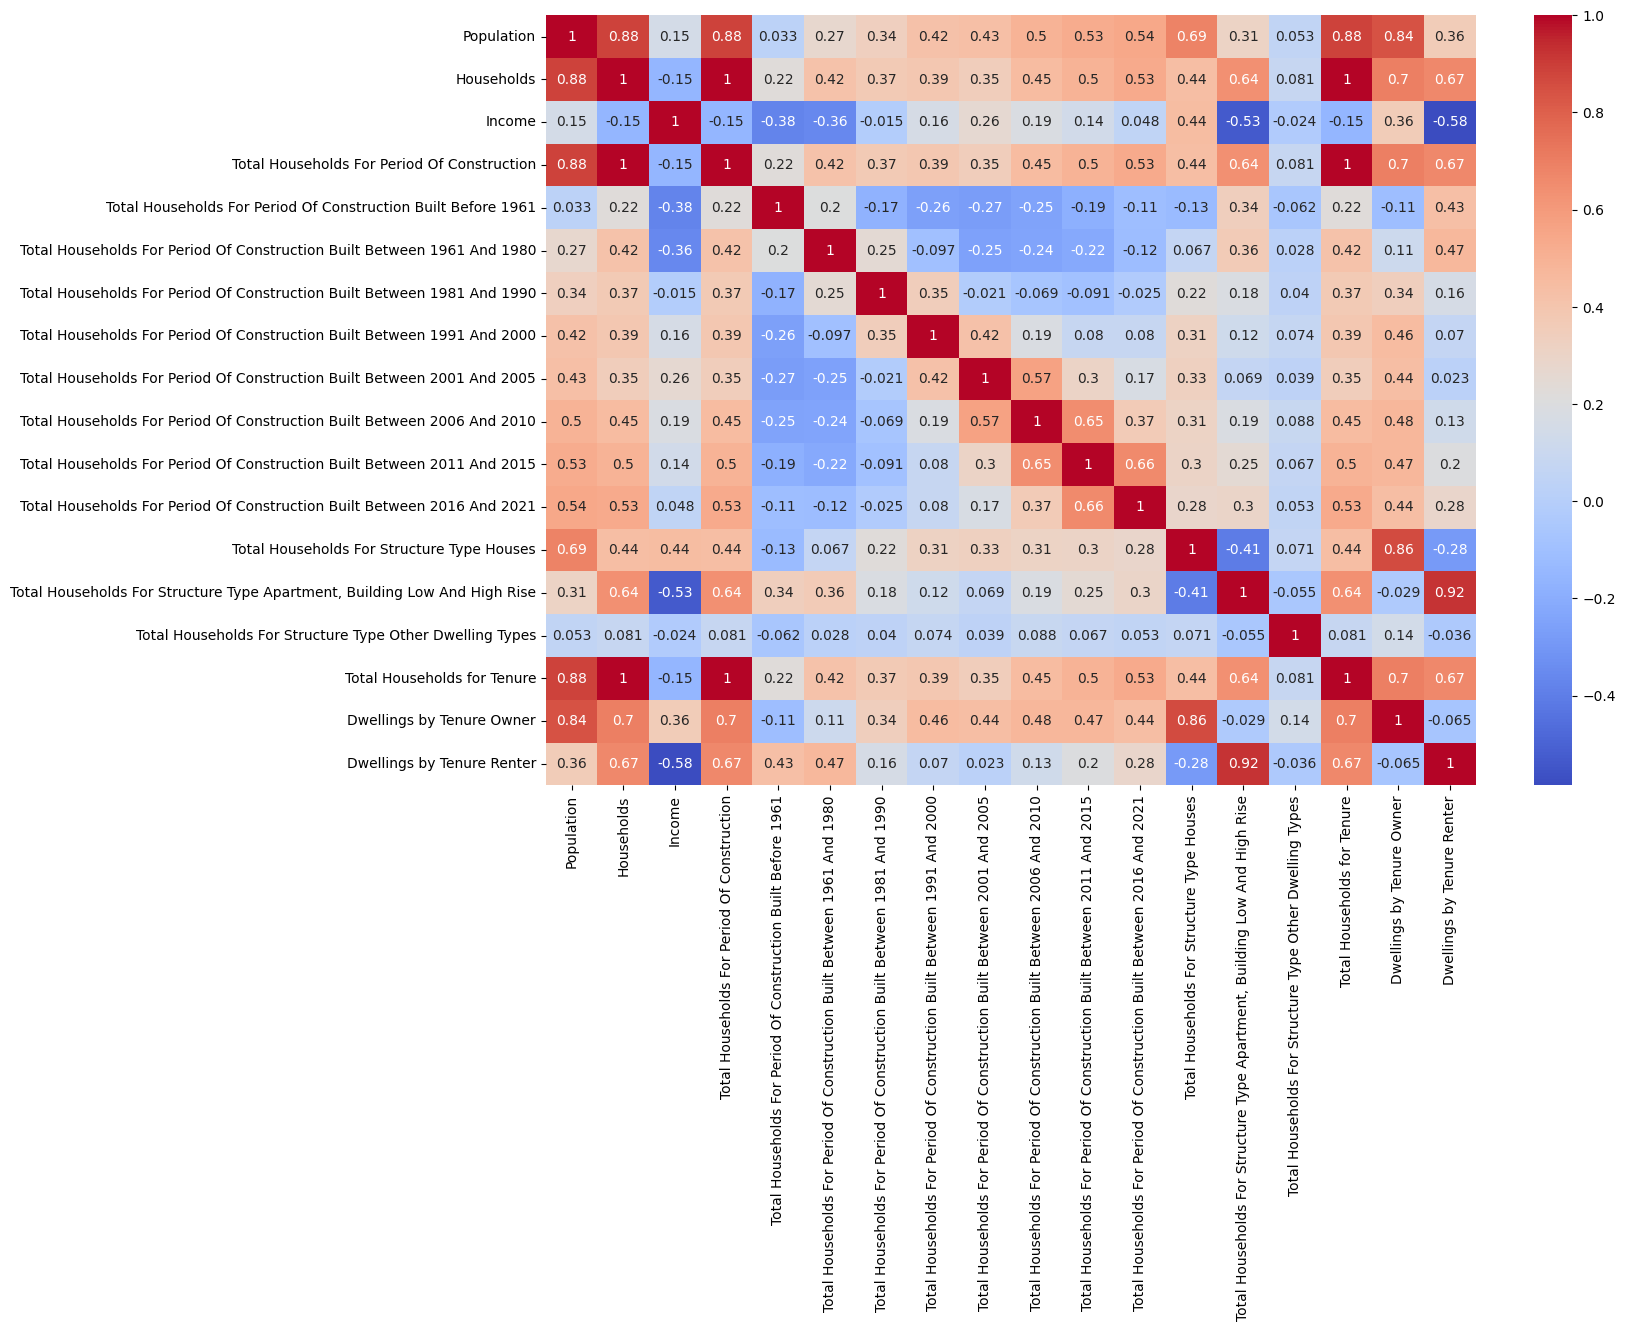

In [31]:
# Drawing a Heatmap for the variables
plt.figure(figsize = (15,10))
sns.heatmap(data_train.corr(),annot=True, cmap = 'coolwarm')

From the EDA report generated above, we observe the following:


1.   Variables **Total Households**, **Total Households for Period Construction**, and **Total Households for Tenure** are perfectly correlated with each other.
2.   **Total Households** and **Total Population** is highly correlated (i.e. 0.88).
3.   **Dwellings by Tenure Owner** and **Total Households For Structure Type Houses** are hightly correlated (corr = 0.86), similarly we find that **Dwellings by Tenure Renter** and **Total Households For Structure Type Apartment, Building Low And High Rise** are hightly correlated too (corr = 0.92).
4.   The percentage of **Total Households For Structure Type Other Dwelling Types** of total households are very small in many Census Tracts.
5.   Variables of the type **Total Households For Structure Type...** generally exhibited a higher association with the response variable (so perhaps we should only include one set of these two variables)
6.   Variables **Total Households**, **Total Population**, **Total Households for Period Construction**, and **Total Households for Tenure** showed no (or very trivial) association with the response variable.

Steps of Data Preprocessing:
1.   We can remove **Total Households for Period Construction** and **Total Households for Tenure** as **Total Households** includes both.
2.   We can remove **Total Population** as it is (1). highly correlated with **Total Households**.
3.   We can remove the variables of the type **Dwellings by...** as they are highly correlated with the variables of the type **Total Households For Structure Type...** as mentioned above.
4.   **Total Households For Structure Type Other Dwelling Types** also had no association with the response variable. So we can derive a new column called **% of Total Households For Structure Type Houses**
5.  Similarly we derive percentage columns for **Total Households For Period Of Construction...** in order to provide better insights for our analysis.







### Data Preprocessing Based on EDA

In [63]:
# remove Total Households for Period Construction, Total Households for Tenure and Total Population
train_cleaned = data_train.drop(columns = ["Total Households For Period Of Construction",
                                           "Total Households for Tenure",
                                           "Population",
                                           "Dwellings by Tenure Owner",
                                           "Dwellings by Tenure Renter"])

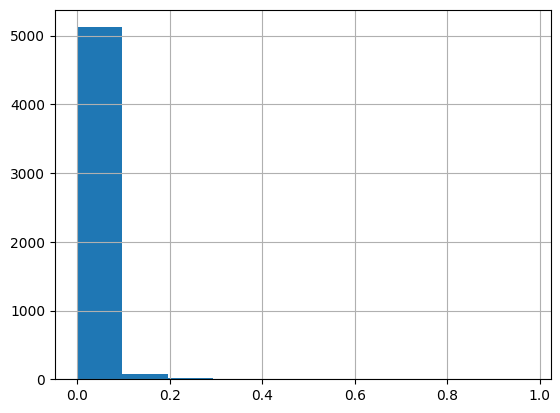

In [38]:
train_cleaned['pct_str_other'] = train_cleaned['Total Households For Structure Type Other Dwelling Types'] / train_cleaned['Households']
train_cleaned['pct_str_other'].hist()
train_cleaned.drop(columns= ['pct_str_other'], inplace = True) # delete after analysis

In [39]:
# Adding derived columns - percentages

train_cleaned["pct_1961_before"] = train_cleaned['Total Households For Period Of Construction Built Before 1961'] / train_cleaned['Households']
train_cleaned["pct_1961_1980"] = train_cleaned['Total Households For Period Of Construction Built Between 1961 And 1980'] / train_cleaned['Households']
train_cleaned["pct_1981_1990"] = train_cleaned['Total Households For Period Of Construction Built Between 1981 And 1990'] / train_cleaned['Households']
train_cleaned["pct_1991_2000"] = train_cleaned['Total Households For Period Of Construction Built Between 1991 And 2000'] / train_cleaned['Households']
train_cleaned["pct_2001_2005"] = train_cleaned['Total Households For Period Of Construction Built Between 2001 And 2005'] / train_cleaned['Households']
train_cleaned["pct_2006_2010"] = train_cleaned['Total Households For Period Of Construction Built Between 2006 And 2010'] / train_cleaned['Households']
train_cleaned["pct_2011_2015"] = train_cleaned['Total Households For Period Of Construction Built Between 2011 And 2015'] / train_cleaned['Households']
train_cleaned["pct_2016_2021"] = train_cleaned['Total Households For Period Of Construction Built Between 2016 And 2021'] / train_cleaned['Households']
train_cleaned["pct_house"] = train_cleaned['Total Households For Structure Type Houses'] / train_cleaned['Households']

# Dropping originals
train_cleaned.drop(columns= ["Total Households For Structure Type Apartment, Building Low And High Rise",
                             "Total Households For Structure Type Other Dwelling Types",
                             "Total Households For Structure Type Houses",
                             'Total Households For Period Of Construction Built Before 1961',
                             'Total Households For Period Of Construction Built Between 1961 And 1980',
                             'Total Households For Period Of Construction Built Between 1981 And 1990',
                             'Total Households For Period Of Construction Built Between 1991 And 2000',
                             'Total Households For Period Of Construction Built Between 2001 And 2005',
                             'Total Households For Period Of Construction Built Between 2006 And 2010',
                             'Total Households For Period Of Construction Built Between 2011 And 2015',
                             'Total Households For Period Of Construction Built Between 2016 And 2021'], inplace = True)



In [64]:
train_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5245 entries, 0 to 5370
Data columns (total 13 columns):
 #   Column                                                                     Non-Null Count  Dtype  
---  ------                                                                     --------------  -----  
 0   Households                                                                 5245 non-null   float64
 1   Income                                                                     5245 non-null   float64
 2   Total Households For Period Of Construction Built Before 1961              5245 non-null   float64
 3   Total Households For Period Of Construction Built Between 1961 And 1980    5245 non-null   float64
 4   Total Households For Period Of Construction Built Between 1981 And 1990    5245 non-null   float64
 5   Total Households For Period Of Construction Built Between 1991 And 2000    5245 non-null   float64
 6   Total Households For Period Of Construction Built Betwee

In [41]:
train_cleaned.head()

,Households,Income,pct_1961_before,pct_1961_1980,pct_1981_1990,pct_1991_2000,pct_2001_2005,pct_2006_2010,pct_2011_2015,pct_2016_2021,pct_house
0,1235.0,107000.0,0.020243,0.914980,0.040486,0.012146,0.008097,0.008097,0.000000,0.000000,0.919028
1,1665.0,111000.0,0.000000,0.000000,0.000000,0.009009,0.012012,0.225225,0.189189,0.561562,0.963964
2,2775.0,105000.0,0.037838,0.054054,0.086486,0.436036,0.200000,0.059459,0.086486,0.043243,0.855856
3,1775.0,65000.0,0.118310,0.619718,0.146479,0.047887,0.019718,0.025352,0.016901,0.008451,0.712676
4,1385.0,101000.0,0.007220,0.137184,0.729242,0.119134,0.000000,0.000000,0.007220,0.000000,0.747292


### Data Visualization


<Axes: >

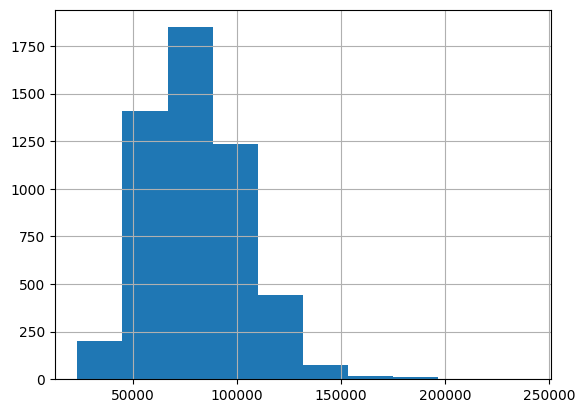

In [42]:
train_cleaned['Income'].hist()

<Axes: >

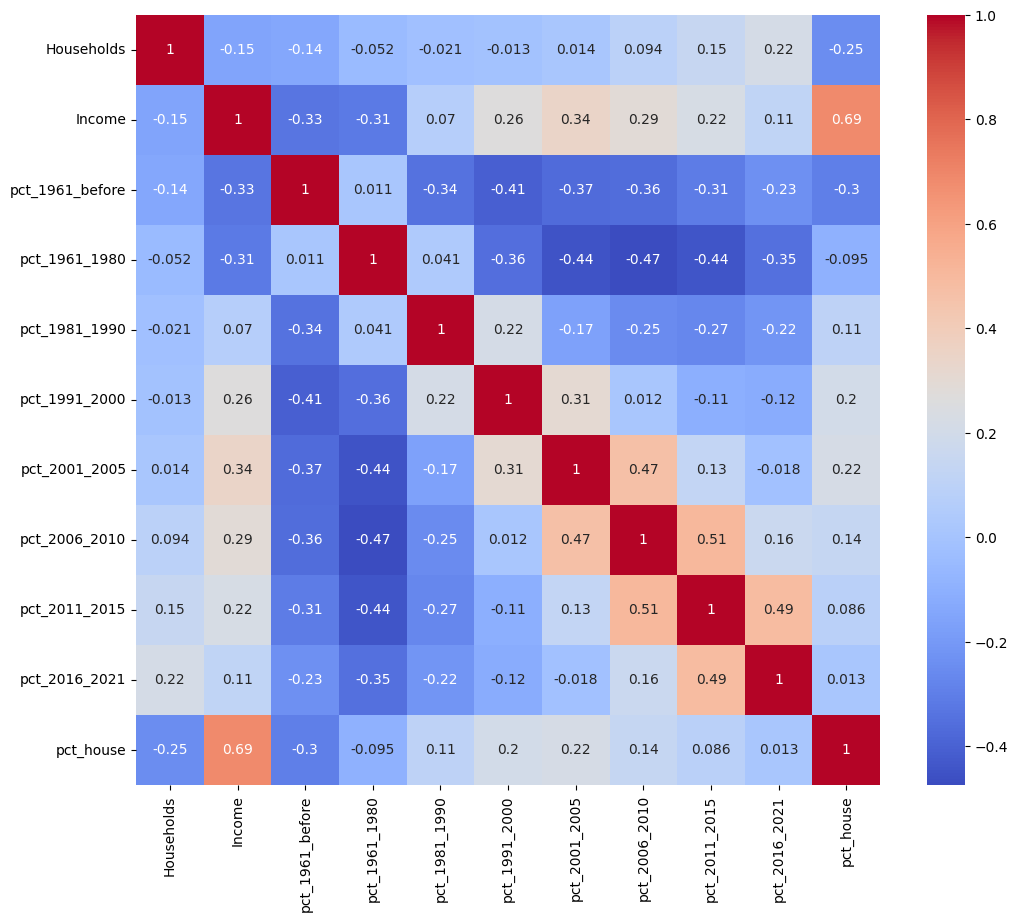

In [45]:
# Drawing a Heatmap for the variables
plt.figure(figsize = (12,10))
sns.heatmap(train_cleaned.corr(),annot=True, cmap = 'coolwarm')

[Text(0, 0, 'Households'),
 Text(0, 1, 'Income'),
 Text(0, 2, 'pct_1961_before'),
 Text(0, 3, 'pct_1961_1980'),
 Text(0, 4, 'pct_1981_1990'),
 Text(0, 5, 'pct_1991_2000'),
 Text(0, 6, 'pct_2001_2005'),
 Text(0, 7, 'pct_2006_2010'),
 Text(0, 8, 'pct_2011_2015'),
 Text(0, 9, 'pct_2016_2021'),
 Text(0, 10, 'pct_house')]

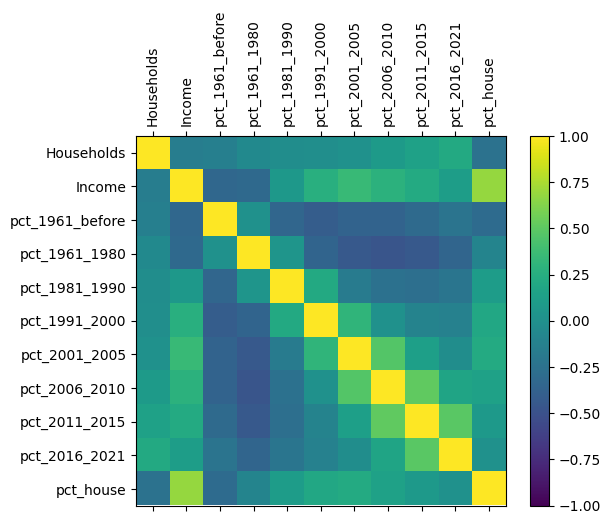

In [43]:
# Constructing a Correlation Matrix for the selected data
correlations = train_cleaned.corr(numeric_only = True)
# plot correlation matrix (generic)
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(correlations, vmin=-1, vmax=1)
fig.colorbar(cax)


# change the tick labels
ticks = range(0,11,1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
numeric_columns = train_cleaned.select_dtypes(include='number')
ax.set_xticklabels(numeric_columns, rotation=90)
ax.set_yticklabels(numeric_columns)

## NEW BRANCH: Aggregated Dataset

In [66]:
# Drop the cols first
data_train_agg = data_train.drop(columns = ["Total Households For Period Of Construction",
                                           "Total Households for Tenure",
                                           "Population",
                                           "Dwellings by Tenure Owner",
                                           "Dwellings by Tenure Renter"])

In [70]:
# Aggregation
data_train_agg = data_train_agg.groupby('Income').sum().reset_index()
data_train_agg = data_train_agg.sort_values(by ='Income', ascending=False)

In [71]:
data_train_agg.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 213 entries, 212 to 0
Data columns (total 13 columns):
 #   Column                                                                     Non-Null Count  Dtype  
---  ------                                                                     --------------  -----  
 0   Income                                                                     213 non-null    float64
 1   Households                                                                 213 non-null    float64
 2   Total Households For Period Of Construction Built Before 1961              213 non-null    float64
 3   Total Households For Period Of Construction Built Between 1961 And 1980    213 non-null    float64
 4   Total Households For Period Of Construction Built Between 1981 And 1990    213 non-null    float64
 5   Total Households For Period Of Construction Built Between 1991 And 2000    213 non-null    float64
 6   Total Households For Period Of Construction Built Between 

In [72]:
data_train_agg_pct = data_train_agg.copy()
data_train_agg_pct["pct_1961_before"] = data_train_agg_pct['Total Households For Period Of Construction Built Before 1961'] / data_train_agg_pct['Households']
data_train_agg_pct["pct_1961_1980"] = data_train_agg_pct['Total Households For Period Of Construction Built Between 1961 And 1980'] / data_train_agg_pct['Households']
data_train_agg_pct["pct_1981_1990"] = data_train_agg_pct['Total Households For Period Of Construction Built Between 1981 And 1990'] / data_train_agg_pct['Households']
data_train_agg_pct["pct_1991_2000"] = data_train_agg_pct['Total Households For Period Of Construction Built Between 1991 And 2000'] / data_train_agg_pct['Households']
data_train_agg_pct["pct_2001_2005"] = data_train_agg_pct['Total Households For Period Of Construction Built Between 2001 And 2005'] / data_train_agg_pct['Households']
data_train_agg_pct["pct_2006_2010"] = data_train_agg_pct['Total Households For Period Of Construction Built Between 2006 And 2010'] / data_train_agg_pct['Households']
data_train_agg_pct["pct_2011_2015"] = data_train_agg_pct['Total Households For Period Of Construction Built Between 2011 And 2015'] / data_train_agg_pct['Households']
data_train_agg_pct["pct_2016_2021"] = data_train_agg_pct['Total Households For Period Of Construction Built Between 2016 And 2021'] / data_train_agg_pct['Households']
data_train_agg_pct["pct_house"] = data_train_agg_pct['Total Households For Structure Type Houses'] / data_train_agg_pct['Households']

# Dropping originals
data_train_agg_pct.drop(columns= ["Total Households For Structure Type Apartment, Building Low And High Rise",
                             "Total Households For Structure Type Other Dwelling Types",
                             "Total Households For Structure Type Houses",
                             'Total Households For Period Of Construction Built Before 1961',
                             'Total Households For Period Of Construction Built Between 1961 And 1980',
                             'Total Households For Period Of Construction Built Between 1981 And 1990',
                             'Total Households For Period Of Construction Built Between 1991 And 2000',
                             'Total Households For Period Of Construction Built Between 2001 And 2005',
                             'Total Households For Period Of Construction Built Between 2006 And 2010',
                             'Total Households For Period Of Construction Built Between 2011 And 2015',
                             'Total Households For Period Of Construction Built Between 2016 And 2021'], inplace = True)

In [74]:
data_train_agg_pct.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 213 entries, 212 to 0
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Income           213 non-null    float64
 1   Households       213 non-null    float64
 2   pct_1961_before  213 non-null    float64
 3   pct_1961_1980    213 non-null    float64
 4   pct_1981_1990    213 non-null    float64
 5   pct_1991_2000    213 non-null    float64
 6   pct_2001_2005    213 non-null    float64
 7   pct_2006_2010    213 non-null    float64
 8   pct_2011_2015    213 non-null    float64
 9   pct_2016_2021    213 non-null    float64
 10  pct_house        213 non-null    float64
dtypes: float64(11)
memory usage: 20.0 KB


In [76]:
data_train_agg_pct.head(30)

,Income,Households,pct_1961_before,pct_1961_1980,pct_1981_1990,pct_1991_2000,pct_2001_2005,pct_2006_2010,pct_2011_2015,pct_2016_2021,pct_house
212,240000.0,665.0,0.827068,0.090226,0.037594,0.022556,0.000000,0.000000,0.015038,0.000000,0.969925
211,208000.0,990.0,0.909091,0.065657,0.010101,0.000000,0.000000,0.000000,0.000000,0.000000,0.944444
210,206000.0,870.0,0.833333,0.068966,0.022989,0.034483,0.011494,0.017241,0.011494,0.000000,0.827586
209,194000.0,1945.0,0.820051,0.056555,0.007712,0.020566,0.012853,0.035990,0.028278,0.015424,0.796915
208,190000.0,1310.0,0.587786,0.171756,0.099237,0.038168,0.019084,0.015267,0.007634,0.045802,0.881679
207,188000.0,110.0,0.000000,0.181818,0.181818,0.363636,0.090909,0.000000,0.000000,0.227273,0.909091
206,184000.0,1060.0,0.283019,0.099057,0.117925,0.127358,0.122642,0.113208,0.084906,0.042453,0.948113
205,180000.0,3295.0,0.086495,0.080425,0.150228,0.229135,0.220030,0.113809,0.040971,0.074355,0.915023
204,178000.0,2185.0,0.702517,0.080092,0.029748,0.036613,0.016018,0.038902,0.036613,0.052632,0.860412
203,176000.0,1010.0,0.000000,0.000000,0.009901,0.000000,0.009901,0.049505,0.722772,0.212871,0.955446


from matplotlib import pyplot as plt
_df_0['Income'].plot(kind='hist', bins=20, title='Income')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['Households'].plot(kind='hist', bins=20, title='Households')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['pct_1961_before'].plot(kind='hist', bins=20, title='pct_1961_before')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['pct_1961_1980'].plot(kind='hist', bins=20, title='pct_1961_1980')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_4.plot(kind='scatter', x='Income', y='Households', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_5.plot(kind='scatter', x='Households', y='pct_1961_before', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_6.plot(kind='scatter', x='pct_1961_before', y='pct_1961_1980', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_7.plot(kind='scatter', x='pct_1961_1980', y='pct_1981_1990', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_8['Income'].plot(kind='line', figsize=(8, 4), title='Income')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_9['Households'].plot(kind='line', figsize=(8, 4), title='Households')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_10['pct_1961_before'].plot(kind='line', figsize=(8, 4), title='pct_1961_before')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_11['pct_1961_1980'].plot(kind='line', figsize=(8, 4), title='pct_1961_1980')
plt.gca().spines[['top', 'right']].set_visible(False)

### Visualization - Aggregates

<Axes: >

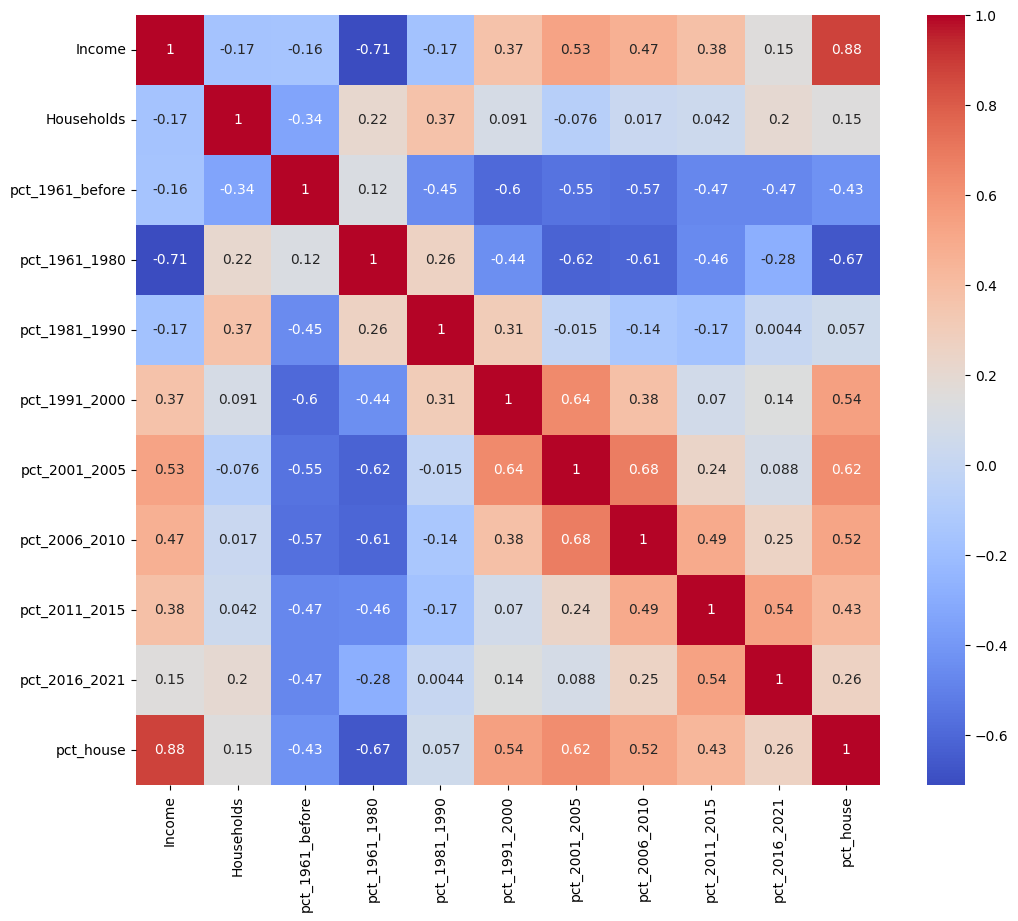

In [78]:
# Drawing a Heatmap for the variables
plt.figure(figsize = (12,10))
sns.heatmap(data_train_agg_pct.corr(),annot=True, cmap = 'coolwarm')

<Axes: >

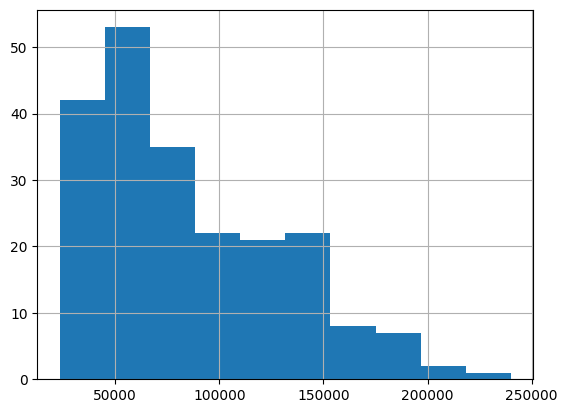

In [108]:
data_train_agg_pct['Income'].hist()

<Axes: >

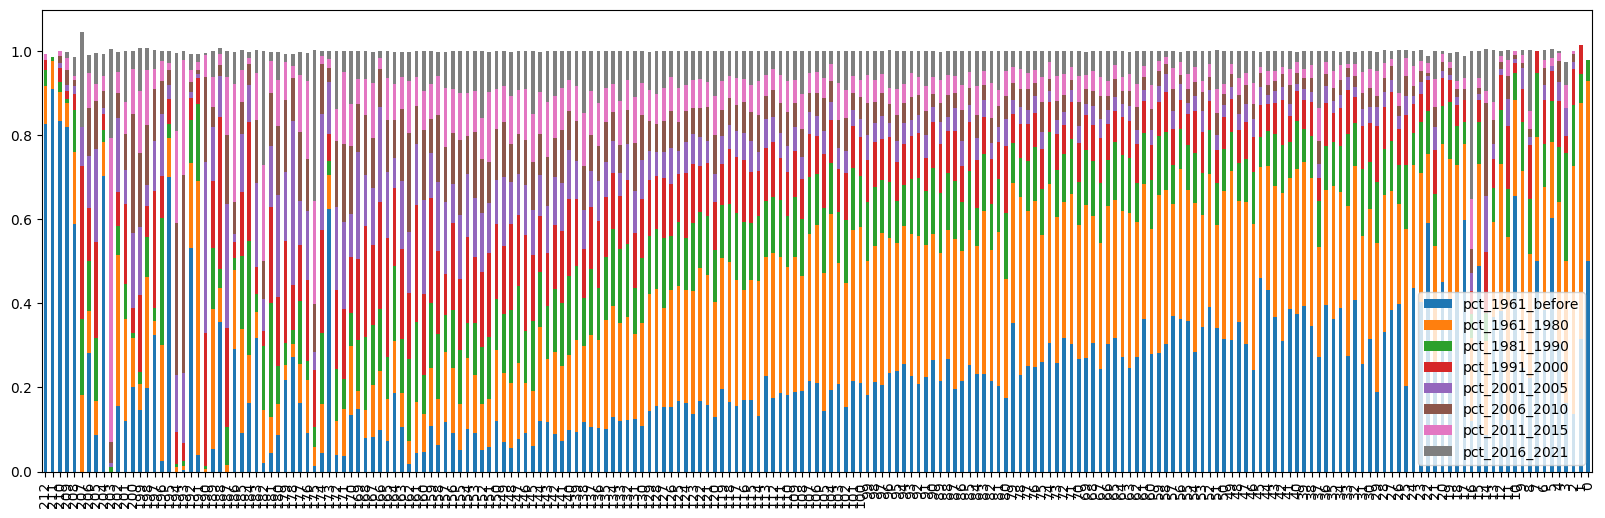

In [123]:
#
fig, ax = plt.subplots(figsize=(20,6))
# ax.xaxis(data_train_agg_pct['Income'])
data_train_agg_pct.iloc[:, 2:10].plot(kind = 'bar', stacked=True, ax =ax)

## Caution:
We can see from the histogram that the household size of each census tract varies greatly, so every ML needs to take that into account.

https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html

sklearn.neighbors.KNeighborsClassifier(n_neighbors=5, *, weights='uniform', algorithm='auto', leaf_size=30, p=2, metric='minkowski', metric_params=None, n_jobs=None)[source]


weights='uniform' Needs to be modified as **train_cleaned['Total Household']**

This applies to other ML algo as well.

<Axes: >

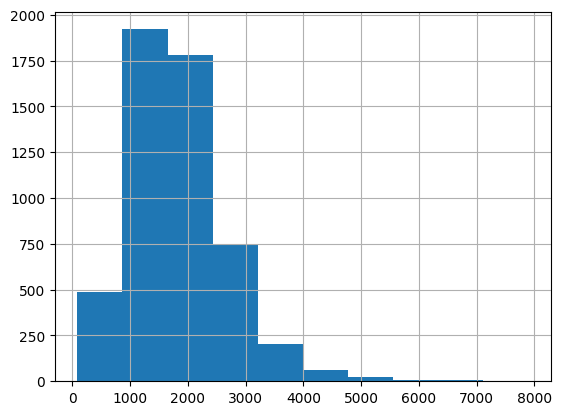

In [46]:
train_cleaned['Households'].hist()


## Part II

### Model Construction

In [ ]:
from sklearn.metrics import silhouette_score
from sklearn import preprocessing, metrics

In [ ]:
 # Dropping the variable Median Household Income
model_train = train_cleaned.drop(columns = ["Median Household Income (Current Year $)"])

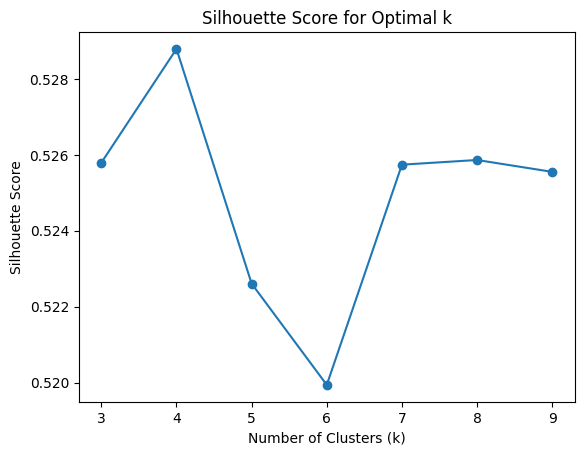

In [ ]:
# Constructing a KMeans Model using the Silhouette Score
silhouette_scores = []
K_range = range(3, 10)
for k in K_range:
    model = KMeans(n_clusters=k, init='k-means++', n_init=10, max_iter=300, random_state=1)
    labels = model.fit_predict(model_train)
    silhouette_avg = silhouette_score(model_train, labels)
    silhouette_scores.append(silhouette_avg)

plt.plot(K_range, silhouette_scores, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for Optimal k')
plt.show()

In [ ]:
silhouette_scores.index(max(silhouette_scores))

1

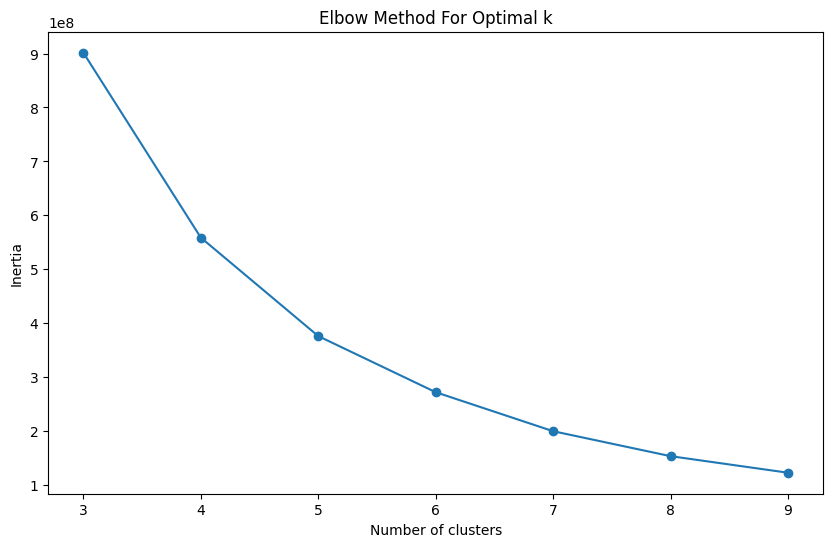

In [ ]:
# Constructing a KMeans Model using the Elbow Method
inertias = []
K_range = range(3, 10)
for k in K_range:
    model = KMeans(n_clusters=k, init='k-means++', n_init=10, max_iter=300, random_state=1)
    model.fit(model_train)
    inertias.append(model.inertia_)

plt.figure(figsize=(10,6))
plt.plot(K_range, inertias, marker='o')
plt.title('Elbow Method For Optimal k')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

In [ ]:
#
optimal_k = 4
model = KMeans(n_clusters=optimal_k, random_state=42)
model.fit(model_train)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=4, random_state=42)

In [ ]:
labels = model.labels_
model_train['cluster'] = labels
model_train.head()

,Total Households,pct_1961_before,pct_1961_1980,pct_1981_1990,pct_1991_2000,pct_2001_2005,pct_2006_2010,pct_2011_2015,pct_2016_2021,pct_house,cluster
0,1235.0,0.020243,0.914980,0.040486,0.012146,0.008097,0.008097,0.000000,0.000000,0.919028,3
1,1665.0,0.000000,0.000000,0.000000,0.009009,0.012012,0.225225,0.189189,0.561562,0.963964,1
2,2775.0,0.037838,0.054054,0.086486,0.436036,0.200000,0.059459,0.086486,0.043243,0.855856,0
3,1775.0,0.118310,0.619718,0.146479,0.047887,0.019718,0.025352,0.016901,0.008451,0.712676,1
4,1385.0,0.007220,0.137184,0.729242,0.119134,0.000000,0.000000,0.007220,0.000000,0.747292,1


In [ ]:
cluster_summaries = model_train.groupby('cluster').agg({'Households': ['mean', 'std'],
                                                        'pct_1961_before': ['mean', 'std'],
                                                        'pct_1961_1980': ['mean', 'std'],
                                                        'pct_1981_1990': ['mean', 'std'],
                                                        'pct_1991_2000': ['mean', 'std'],
                                                        'pct_2001_2005': ['mean', 'std'],
                                                        'pct_2006_2010': ['mean', 'std'],
                                                        'pct_2011_2015': ['mean', 'std'],
                                                        'pct_2016_2021': ['mean', 'std'],
                                                        'pct_house': ['mean', 'std'],})
print(cluster_summaries)

        Total Households             pct_1961_before           pct_1961_1980  \
                    mean         std            mean       std          mean   
cluster                                                                        
0            2680.499195  338.168731        0.177706  0.167710      0.278129   
1            1765.552842  238.765183        0.197630  0.217193      0.286057   
2            4377.611111  889.434642        0.089681  0.098309      0.174424   
3             972.854870  305.932917        0.235628  0.246291      0.277829   

                  pct_1981_1990           pct_1991_2000            \
              std          mean       std          mean       std   
cluster                                                             
0        0.170543      0.134599  0.097108      0.120408  0.089911   
1        0.207960      0.144953  0.136752      0.131016  0.135939   
2        0.142928      0.095713  0.068081      0.108995  0.079266   
3        0.221830      0.

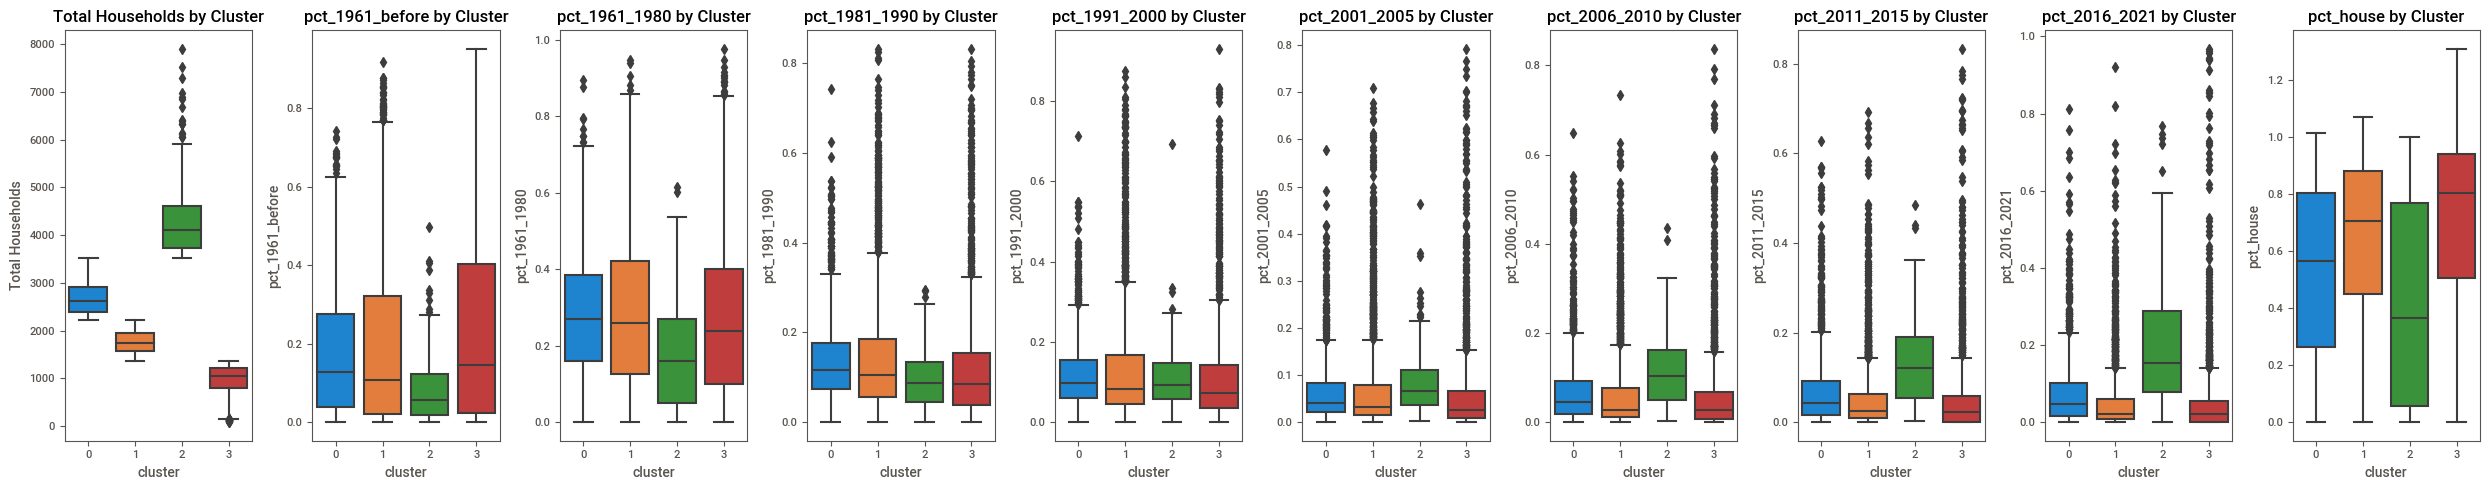

In [ ]:
num_features = 10
fig, axes = plt.subplots(1, num_features, figsize=(25, 5))
features_to_visualize = ['Households', 'pct_1961_before', 'pct_1961_1980',
                         'pct_1981_1990', 'pct_1991_2000', 'pct_2001_2005',
                         'pct_2006_2010', 'pct_2011_2015', 'pct_2016_2021', 'pct_house']
for i, feature in enumerate(features_to_visualize):
    ax = sns.boxplot(x='cluster', y=feature, data=model_train, ax=axes[i])
    ax.set_title(f'{feature} by Cluster')

plt.tight_layout()
plt.show()

### Segmentation Models

In [ ]:
#Move back the median variable to the dataset
train_cleaned['cluster'] = labels
train_cleaned.head()

,Total Households,Median Household Income (Current Year $),pct_1961_before,pct_1961_1980,pct_1981_1990,pct_1991_2000,pct_2001_2005,pct_2006_2010,pct_2011_2015,pct_2016_2021,pct_house,cluster
0,1235.0,107000.0,0.020243,0.914980,0.040486,0.012146,0.008097,0.008097,0.000000,0.000000,0.919028,3
1,1665.0,111000.0,0.000000,0.000000,0.000000,0.009009,0.012012,0.225225,0.189189,0.561562,0.963964,1
2,2775.0,105000.0,0.037838,0.054054,0.086486,0.436036,0.200000,0.059459,0.086486,0.043243,0.855856,0
3,1775.0,65000.0,0.118310,0.619718,0.146479,0.047887,0.019718,0.025352,0.016901,0.008451,0.712676,1
4,1385.0,101000.0,0.007220,0.137184,0.729242,0.119134,0.000000,0.000000,0.007220,0.000000,0.747292,1


In [ ]:
#Get dummies
dataset=pd.get_dummies(train_cleaned,columns=['cluster'])
dataset.head()


,Total Households,Median Household Income (Current Year $),pct_1961_before,pct_1961_1980,pct_1981_1990,pct_1991_2000,pct_2001_2005,pct_2006_2010,pct_2011_2015,pct_2016_2021,pct_house,cluster_0,cluster_1,cluster_2,cluster_3
0,1235.0,107000.0,0.020243,0.914980,0.040486,0.012146,0.008097,0.008097,0.000000,0.000000,0.919028,0,0,0,1
1,1665.0,111000.0,0.000000,0.000000,0.000000,0.009009,0.012012,0.225225,0.189189,0.561562,0.963964,0,1,0,0
2,2775.0,105000.0,0.037838,0.054054,0.086486,0.436036,0.200000,0.059459,0.086486,0.043243,0.855856,1,0,0,0
3,1775.0,65000.0,0.118310,0.619718,0.146479,0.047887,0.019718,0.025352,0.016901,0.008451,0.712676,0,1,0,0
4,1385.0,101000.0,0.007220,0.137184,0.729242,0.119134,0.000000,0.000000,0.007220,0.000000,0.747292,0,1,0,0


In [ ]:
from google.colab import files
dataset.to_csv('dataset.csv', index=False)
files.download('dataset.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Regression Tree

In [47]:
!pip install dmba

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 78.1 MB/s eta 0:00:00


In [48]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier,DecisionTreeRegressor
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV
from sklearn.metrics import accuracy_score
from dmba import plotDecisionTree, classificationSummary, regressionSummary
from sklearn.tree import DecisionTreeRegressor

Colab environment detected.


In [ ]:
param_grid={
    'max_depth':[3,6,9,10,25],
    'min_impurity_decrease':[0,0.001,0.005,0.01],
    'min_samples_split':[10,20,30,40,50],
}

In [ ]:
gridSearch=GridSearchCV(DecisionTreeClassifier(random_state=42),param_grid,cv=5)

In [ ]:
gridSearch.fit(x_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'max_depth': [5, 10, 15, 20, 25],
                         'min_impurity_decrease': [0, 0.001, 0.005, 0.01],
                         'min_samples_split': [10, 20, 30, 40, 50]})

In [ ]:
print('Initial Parameters:',gridSearch.best_params_)

Initial Parameters: {'max_depth': 5, 'min_impurity_decrease': 0, 'min_samples_split': 30}


In [ ]:
print('Instal Score:',gridSearch.best_score_)

Instal Score: 0.02424363750949971


In [ ]:
param_grid={
    'max_depth':[3,4,5,6,7,8,9,10,11,12],
    'min_impurity_decrease':[0,0.001,0.002,0.003,0.004,0.005,0.006,0.007,0.008],
    'min_samples_split':[14,15,16,18,20],
}

In [ ]:
gridSearch=GridSearchCV(DecisionTreeClassifier(random_state=42),param_grid,cv=5)

In [ ]:
gridSearch.fit(x_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=1),
             param_grid={'max_depth': [3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
                         'min_impurity_decrease': [0, 0.001, 0.002, 0.003,
                                                   0.004, 0.005, 0.006, 0.007,
                                                   0.008],
                         'min_samples_split': [14, 15, 16, 18, 20]})

In [ ]:
print('Improved Parameters:',gridSearch.best_params_)

Improved Parameters: {'max_depth': 5, 'min_impurity_decrease': 0, 'min_samples_split': 14}


In [ ]:
print('Improved Score:',gridSearch.best_score_)

Improved Score: 0.0236990491019296


In [ ]:
regTree=gridSearch.best_estimator_

In [ ]:
regressionSummary(y_train, regTree.predict(x_train))
regressionSummary(y_test, regTree.predict(x_test))


Regression statistics

                      Mean Error (ME) : 1374.1487
       Root Mean Squared Error (RMSE) : 16744.2352
            Mean Absolute Error (MAE) : 11884.7453
          Mean Percentage Error (MPE) : -2.1649
Mean Absolute Percentage Error (MAPE) : 15.4171

Regression statistics

                      Mean Error (ME) : 1273.6341
       Root Mean Squared Error (RMSE) : 16528.6431
            Mean Absolute Error (MAE) : 12394.0915
          Mean Percentage Error (MPE) : -2.3417
Mean Absolute Percentage Error (MAPE) : 16.3475


# KNN Model

In [ ]:
#Perform a KNN model
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

In [ ]:
test_size=0.3
seed = 42
x = dataset.drop(columns = ["Median Household Income (Current Year $)","Total Households"])
y = dataset["Median Household Income (Current Year $)"]
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=test_size, random_state=seed)

In [ ]:
scaler=StandardScaler().fit(x_train)
rescaledx_train=scaler.transform(x_train)

In [ ]:
num_folds=10
scoring='neg_mean_squared_error'
k_values = np.arange(1,22)
param_grid=dict(n_neighbors=k_values)
model=KNeighborsRegressor()
kfold=KFold(n_splits=num_folds,shuffle=True,random_state=seed)
grid=GridSearchCV(estimator=model,param_grid=param_grid,scoring=scoring,cv=kfold)
grid_results = grid.fit(x_train, y_train)
print("Best:%f using %s"%(grid_results.best_score_,grid_results.best_params_))

Best:-242197657.542338 using {'n_neighbors': 17}


In [ ]:
model=KNeighborsRegressor(n_neighbors=17)
model.fit(x_train,y_train)
#recaledx_test=scaler.transform(x_test)
estimates=model.predict(x_test)
estimates

array([82029.41176471, 76270.58823529, 74300.        , ...,
       72229.41176471, 75652.94117647, 67229.41176471])

In [ ]:
mse = mean_squared_error(y_test, estimates)
print(f"Mean Squared Error (MSE): {mse}")

Mean Squared Error (MSE): 218401893.04573014


In [ ]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test, estimates)
print(f"R-squared (R2) Score: {r2}")

R-squared (R2) Score: 0.601425798108477


# ANN Model

In [ ]:
!pip install tensorflow

In [ ]:
!pip install scikeras

In [ ]:
from sklearn import metrics
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from scikeras.wrappers import KerasRegressor
from tensorflow.keras.optimizers import Adam, RMSprop, SGD

In [ ]:
# Set Seed
np.random.seed(1)

# Function to create a Keras model
def create_model(learning_rate=0.001, optimizer='adam',
                        neurons=8, activation='relu',
                        dropout_rate=0.0, weight_initializer='glorot_uniform'):

    if optimizer == 'adam':
        optimizer = Adam(learning_rate=learning_rate)
    elif optimizer == 'rmsprop':
        optimizer = RMSprop(learning_rate=learning_rate)
    elif optimizer == 'sgd':
        optimizer = SGD(learning_rate=learning_rate)

    model = Sequential()

    # Add one hidden layer
    model.add(Dense(neurons, input_shape=(x_train.shape[1],), activation=activation, kernel_initializer=weight_initializer))
    model.add(Dropout(dropout_rate))

    # output layer
    model.add(Dense(1, activation='linear'))

    model.compile(loss='mean_squared_error' , optimizer=optimizer, metrics=['mean_squared_error'])
    return model


# Wrap Keras model to be used in CV
model_cv = KerasRegressor(build_fn=create_model, verbose=0,
                           learning_rate=0.001, optimizer='adam', # set some default parameters to allow the model to be tunable
                           neurons=8, activation='relu',
                           dropout_rate=0.0, weight_initializer='glorot_uniform')

# Define parameters for Grid Search
param_dist_group1 = {
    'batch_size': [200, 300, 400],
    'epochs': [100, 150, 200],
    'learning_rate': [0.001, 0.01, 0.1],
    'optimizer': ['adam', 'rmsprop', 'sgd'],
    'neurons': [32, 64, 128],
    'activation': ['sigmoid', 'relu', 'tanh'],
    'dropout_rate': [0.0, 0.2, 0.4],
    'weight_initializer': ['glorot_uniform', 'he_normal']
}

# Perform Random Search
random = RandomizedSearchCV(estimator=model_cv, param_distributions=param_dist_group1, n_iter=20, cv=3)
random_result = random.fit(x_train, y_train)

# Summarize results
print("Best: %f using %s" % (random_result.best_score_, random_result.best_params_))

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/scikeras

Best: 0.512629 using {'weight_initializer': 'he_normal', 'optimizer': 'adam', 'neurons': 64, 'learning_rate': 0.1, 'epochs': 100, 'dropout_rate': 0.4, 'batch_size': 400, 'activation': 'relu'}


In [ ]:
best_params = {'weight_initializer': 'he_normal', 'optimizer': 'adam', 'neurons': 64, 'learning_rate': 0.1, 'epochs': 100, 'dropout_rate': 0.4, 'batch_size': 400, 'activation': 'relu'}


def create_best_model(neurons=64):

    model = Sequential()

    # Add one hidden layer
    model.add(Dense(best_params['neurons'], activation=best_params['activation'], kernel_initializer=best_params['weight_initializer']))
    model.add(Dropout(best_params['dropout_rate']))

    # output layer
    model.add(Dense(1, activation='linear'))

    # Optimizer configuration
    optimizer = RMSprop(learning_rate=best_params['learning_rate'])

    model.compile(loss='mean_squared_error', optimizer=optimizer, metrics=['mean_squared_error'])
    return model

# Build the best model
best_ann = KerasRegressor(build_fn=create_model, verbose=0,
                           learning_rate=0.001, optimizer='adam', # set some default parameters
                           neurons=64, activation='relu',
                           dropout_rate=0.0, weight_initializer='glorot_uniform')
best_ann._estimator_type = "regressor"

# Train the model on the full Training data(X_random)
best_ann.fit(x_train, y_train, epochs=best_params['epochs'], batch_size=best_params['batch_size'])

# Evaluate the model on the not_use set
predictions = best_ann.predict(x_test)

# accuracy
accuracy = abs(np.mean((predictions - y_test)))
print(f"Test Accuracy: {accuracy:.4f}")

# Confusion Matrix
#confusion_matrix = metrics.confusion_matrix(y_test, predictions)
#confusion_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
#confusion_display.plot()

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


Test Accuracy: 79645.8442


In [ ]:
regressionSummary(y_test,predictions)


Regression statistics

                      Mean Error (ME) : 79645.8442
       Root Mean Squared Error (RMSE) : 83008.2671
            Mean Absolute Error (MAE) : 79645.8442
          Mean Percentage Error (MPE) : 99.5087
Mean Absolute Percentage Error (MAPE) : 99.5087


In [ ]:
def create_model():
    model = Sequential()
    model.add(Dense(12, input_shape=(x_train.shape[1],), activation='relu'))
    model.add(Dense(1, activation='linear'))
    model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
    return model

In [ ]:
model=KerasClassifier(model=create_model,verbose=2)

In [ ]:
batch_size=[10,20,40,60,80,100]
epochs=[10,50,100]
param_grid=dict(batch_size=batch_size,epochs=epochs)

In [ ]:
grid=GridSearchCV(estimator=model, param_grid=param_grid,n_jobs=-1,cv=3)
grid_result=grid.fit(x_train,y_train)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  warnings.warn(


Epoch 1/10
368/368 - 1s - loss: 11833.5078 - mae: 102.8011 - 1s/epoch - 4ms/step
Epoch 2/10
368/368 - 1s - loss: 10005.0186 - mae: 93.6668 - 783ms/epoch - 2ms/step
Epoch 3/10
368/368 - 1s - loss: 7282.1348 - mae: 78.3853 - 571ms/epoch - 2ms/step
Epoch 4/10
368/368 - 1s - loss: 4317.7275 - mae: 58.1933 - 553ms/epoch - 2ms/step
Epoch 5/10
368/368 - 1s - loss: 1929.1847 - mae: 37.3108 - 535ms/epoch - 1ms/step
Epoch 6/10
368/368 - 1s - loss: 928.8992 - mae: 25.0073 - 564ms/epoch - 2ms/step
Epoch 7/10
368/368 - 1s - loss: 787.1686 - mae: 22.3904 - 547ms/epoch - 1ms/step
Epoch 8/10
368/368 - 1s - loss: 727.4426 - mae: 21.1934 - 542ms/epoch - 1ms/step
Epoch 9/10
368/368 - 1s - loss: 679.1681 - mae: 20.3589 - 550ms/epoch - 1ms/step
Epoch 10/10
368/368 - 1s - loss: 642.6394 - mae: 19.5946 - 549ms/epoch - 1ms/step
Best: 0.000000 using {'batch_size': 10, 'epochs': 10}


In [ ]:
# build the model!
model = Sequential()
model.add(Dense(12, input_shape=(x_train.shape[1],), activation='relu')) # (features,)
model.add(Dense(1, activation='linear')) # output node
model.summary() # see what your model looks like

# compile the model
model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])


# fit the model!
# attach it to a new variable called 'history' in case
# to look at the learning curves
